<a href="https://colab.research.google.com/github/MasahiroAraki/MachineLearning3/blob/master/notebook/chap07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-learn optuna --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 23.9 MB/s eta 0:00:00


# 第7章 サポートベクトルマシン

## 例題7.1

`make_classification()` メソッドを用いて線形分離可能な2クラスの2次元データを乱数を使って作成し，`SVC` でマージン最大となる線形識別面を求めよ．

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

乱数を使って、データを生成
* 2クラス
* 特徴ベクトルは2次元（冗長な次元はなし）
* 各クラスにつき一つの正規分布からデータを生成
* ランダムにクラスを反転させることは行わない
* クラスが適度に分かれているように調整

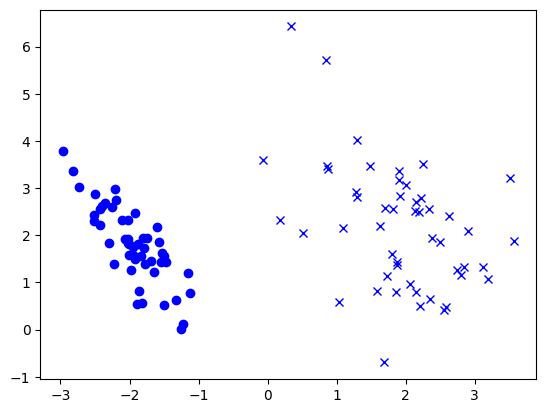

In [3]:
X, y = make_classification(n_features=2, n_redundant=0,
    n_clusters_per_class=1, flip_y=0, class_sep=2.0, random_state=2)
plt.plot(X[y==0,0], X[y==0,1],"bo")
plt.plot(X[y==1,0], X[y==1,1],"bx")
plt.savefig('fig7-3.svg', format='svg', bbox_inches='tight')
plt.show()

線形カーネル(linear)は、この特徴空間でマージン最大化を行うものです。

In [4]:
clf = SVC(kernel='linear')
clf.fit(X, y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


scikit-learn の DecisionBoundaryDisplay で識別面を表示します。各クラスのサポートベクトルと識別面の距離が等しくなっているのがわかります。

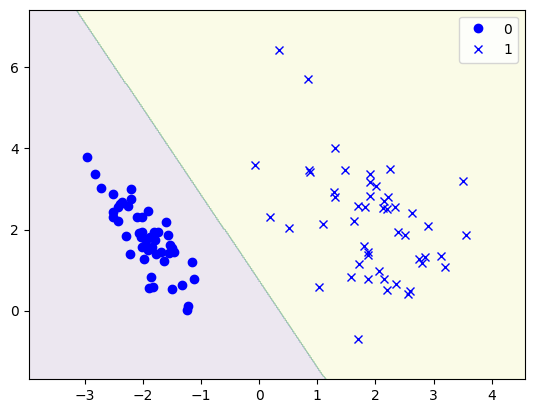

In [5]:
def dataPlot(clf, X, y):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", grid_resolution=400, alpha=0.1)
    plt.plot(X[y == 0, 0], X[y == 0, 1], "bo", label="0")
    plt.plot(X[y == 1, 0], X[y == 1, 1], "bx", label="1")
    plt.legend()
    plt.savefig('fig.svg', format='svg', bbox_inches='tight')
    plt.show()

dataPlot(clf, X, y)

## 例題7.2 ソフトマージンによる誤識別データの吸収

クラスの分離度(class_sep)の値を少し小さくして、やや難しいデータを作成し、同様の手順でSVMによる識別を行います。線型分離不可能なデータなので、スラック変数の重み$C$を引数で与えます。

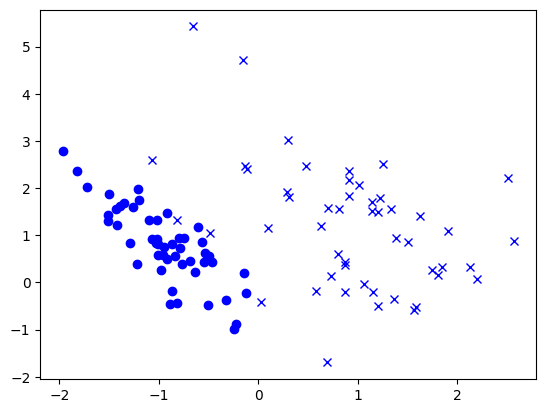

In [6]:
X, y = make_classification(n_features=2, n_redundant=0,
    n_clusters_per_class=1, flip_y=0, class_sep=1.0, random_state=2)
plt.plot(X[y==0,0], X[y==0,1],"bo")
plt.plot(X[y==1,0], X[y==1,1],"bx")
plt.savefig('fig7-6.svg', format='svg', bbox_inches='tight')
plt.show()

In [7]:
clf = SVC(kernel='poly', C=1.0)
clf.fit(X, y)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


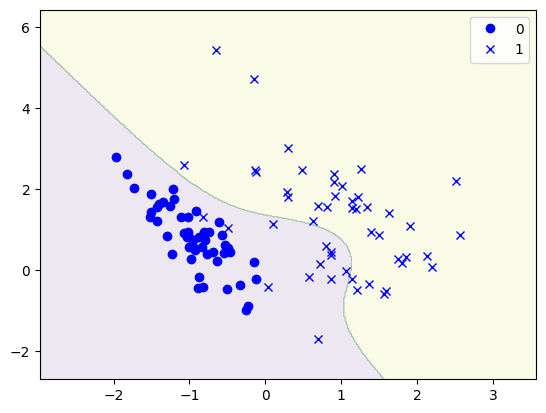

In [8]:
dataPlot(clf, X, y)

## 例題7.3 カーネル関数を用いたSVM

非線形識別面での識別を行うので、さらにデータを複雑なものにします。

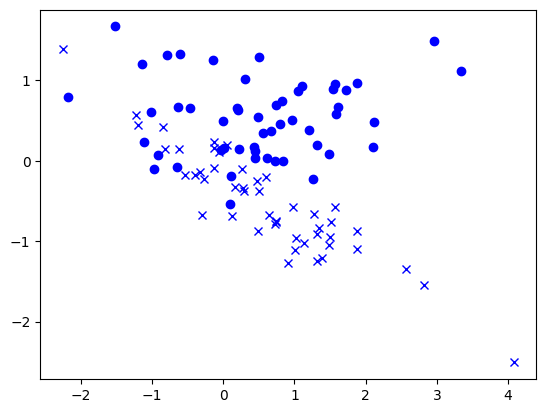

In [9]:
X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, class_sep=0.5, random_state=3)
plt.plot(X[y==0,0], X[y==0,1],"bo")
plt.plot(X[y==1,0], X[y==1,1],"bx")
plt.savefig('s7-5.svg', format='svg', bbox_inches='tight')
plt.show()

多項式カーネル

In [10]:
clf = SVC(kernel='poly', degree=3, C=1)
clf.fit(X, y)

,C,1
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


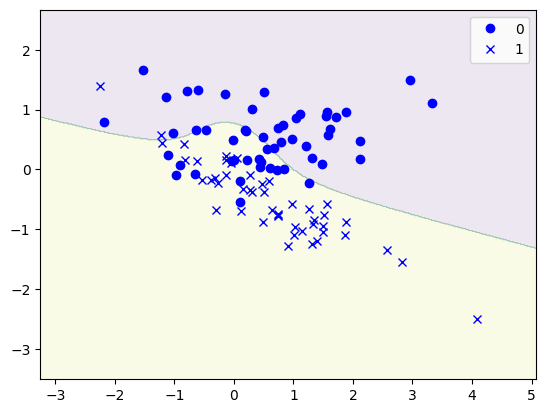

In [11]:
dataPlot(clf, X, y)

RBFカーネル

In [12]:
clf = SVC(kernel='rbf', gamma=1, C=1)
clf.fit(X, y)

,C,1
,kernel,'rbf'
,degree,3
,gamma,1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


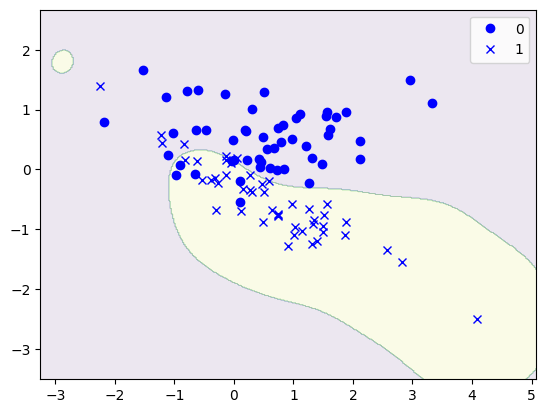

In [13]:
dataPlot(clf, X, y)

## 例題7.4 ハイパーパラメータのグリッドサーチ

In [14]:
from sklearn.model_selection import GridSearchCV

「スラック変数の重みC」と「多項式カーネルの次数degree」の組み合わせでGridSearchを行います。

パラメータとして多項式カーネルを与えて、サポートベクトルマシン[SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)のインスタンスsvcを作成します。

In [15]:
svc = SVC(kernel='poly')
svc

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


GridSearchを行います。「スラック変数の重みC」と「多項式カーネルの次数degree」の組み合わせで、リストを値とする辞書のリスト `param_grid` を作成します。

In [16]:
param_grid = [
  {'C': [0.1, 1, 10, 100, 1000], 'degree': [1,2,3]}
 ]

In [17]:
type(param_grid[0])

dict

識別器のインスタンスを第1引数、グリッドを第2引数として、[GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)のインスタンスを作成し、fitメソッドを実行します。パラメータcvの値がNone（デフォルト）のとき、性能は5-fold CVで評価されます。許容できる実行時間を考えて、この値を調整します。

In [18]:
clf = GridSearchCV(svc, param_grid, cv=3)
clf.fit(X, y)

,estimator,SVC(kernel='poly')
,param_grid,"[{'C': [0.1, 1, ...], 'degree': [1, 2, ...]}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


結果はcv\_results\_属性の値として、辞書型で得られます。また、容易にpandasのDataFrame型に変換できます。

In [19]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001721,0.000072,0.001851,0.000825,0.1,1,"{'C': 0.1, 'degree': 1}",0.823529,0.848485,0.787879,0.819964,0.024870,6
1,0.001575,0.000007,0.001171,0.000094,0.1,2,"{'C': 0.1, 'degree': 2}",0.705882,0.666667,0.696970,0.689840,0.016785,15
2,0.001661,0.000042,0.001141,0.000071,0.1,3,"{'C': 0.1, 'degree': 3}",0.882353,0.696970,0.727273,0.768865,0.081196,11
3,0.001471,0.000028,0.001080,0.000032,1.0,1,"{'C': 1, 'degree': 1}",0.911765,0.848485,0.787879,0.849376,0.050580,4
4,0.001516,0.000012,0.001094,0.000061,1.0,2,"{'C': 1, 'degree': 2}",0.764706,0.787879,0.696970,0.749851,0.038571,13
5,0.001503,0.000025,0.001030,0.000010,1.0,3,"{'C': 1, 'degree': 3}",0.823529,0.848485,0.787879,0.819964,0.024870,6
6,0.001502,0.000055,0.000949,0.000031,10.0,1,"{'C': 10, 'degree': 1}",0.970588,0.878788,0.818182,0.889186,0.062653,1
7,0.002304,0.000924,0.001040,0.000109,10.0,2,"{'C': 10, 'degree': 2}",0.764706,0.787879,0.696970,0.749851,0.038571,13
8,0.003242,0.001037,0.004078,0.001161,10.0,3,"{'C': 10, 'degree': 3}",0.764706,0.727273,0.878788,0.790255,0.064440,9
9,0.006596,0.003083,0.002656,0.000928,100.0,1,"{'C': 100, 'degree': 1}",0.970588,0.878788,0.818182,0.889186,0.062653,1


すべてのパラメータの組み合わせについて、スコアを表示します

In [20]:
re = clf.cv_results_
for params, mean_score, std_score in zip(re['params'], re['mean_test_score'], re['std_test_score']):
    print(f"{mean_score:.3f} (+/- {std_score*2:.3f}) for {params}")

0.820 (+/- 0.050) for {'C': 0.1, 'degree': 1}
0.690 (+/- 0.034) for {'C': 0.1, 'degree': 2}
0.769 (+/- 0.162) for {'C': 0.1, 'degree': 3}
0.849 (+/- 0.101) for {'C': 1, 'degree': 1}
0.750 (+/- 0.077) for {'C': 1, 'degree': 2}
0.820 (+/- 0.050) for {'C': 1, 'degree': 3}
0.889 (+/- 0.125) for {'C': 10, 'degree': 1}
0.750 (+/- 0.077) for {'C': 10, 'degree': 2}
0.790 (+/- 0.129) for {'C': 10, 'degree': 3}
0.889 (+/- 0.125) for {'C': 100, 'degree': 1}
0.780 (+/- 0.077) for {'C': 100, 'degree': 2}
0.820 (+/- 0.083) for {'C': 100, 'degree': 3}
0.889 (+/- 0.125) for {'C': 1000, 'degree': 1}
0.760 (+/- 0.055) for {'C': 1000, 'degree': 2}
0.810 (+/- 0.023) for {'C': 1000, 'degree': 3}


性能が最大となるパラメータとそのときのスコアを表示します。

In [21]:
print(f'Best parameters: {clf.best_params_}')
print(f'Best score: {clf.best_score_:.3f}')

Best parameters: {'C': 10, 'degree': 1}
Best score: 0.889


### ガウス過程回帰の説明

In [22]:
from sklearn import gaussian_process
from sklearn.gaussian_process import kernels

In [23]:
X = np.array([-4, -3, -1, 0, 2])
y = np.array([-2, 0,-1, 2, -1])
xs = np.linspace(-5, 5, 101)
kernel = kernels.RBF(length_scale=np.sqrt(2)) + kernels.WhiteKernel(noise_level=0.05)

In [24]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel, optimizer=None)
gp.fit(X[:, None], y)
mu, std = gp.predict(xs[:, None], return_std=True)

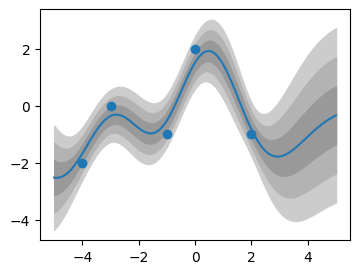

In [25]:
plt.figure(figsize=(4,3))
plt.plot(xs, mu)
for i in [3, 2, 1]:
  plt.fill_between(xs, mu+i*std, mu-i*std, color=str(0.5+0.1*i))
plt.scatter(X, y)
plt.show()

## 例題7.5 ベイズ最適化

Optuna の TPE を用いて，Diabetes データに対して SVR の性能が高くなるハイパーパラメータを求めよ．

In [26]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import optuna

In [27]:
X, y = load_diabetes(return_X_y=True, as_frame=True)

In [28]:
def objective(trial):
  gamma = trial.suggest_float('gamma', 1e-3, 1e3)
  C = trial.suggest_float('C', 1e-3, 1e3)
  reg = SVR(kernel='rbf', gamma=gamma, C=C)
  score = cross_val_score(reg, X, y, cv=3, scoring="r2")
  r2_mean = score.mean()
  return r2_mean

In [29]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, timeout=30)
print('params:', study.best_params)

[I 2025-10-09 06:57:56,016] A new study created in memory with name: no-name-00ba519c-9e38-4418-a7bc-d69d8038ef24
[I 2025-10-09 06:57:56,355] Trial 0 finished with value: 0.26600870715298025 and parameters: {'gamma': 352.63390876032133, 'C': 211.33267413885366}. Best is trial 0 with value: 0.26600870715298025.
[I 2025-10-09 06:57:56,704] Trial 1 finished with value: 0.05807614821446405 and parameters: {'gamma': 855.7581406538912, 'C': 392.44731901187566}. Best is trial 0 with value: 0.26600870715298025.
[I 2025-10-09 06:57:56,844] Trial 2 finished with value: 0.3320374439531733 and parameters: {'gamma': 220.70454434169682, 'C': 395.3324559354995}. Best is trial 2 with value: 0.3320374439531733.
[I 2025-10-09 06:57:56,966] Trial 3 finished with value: 0.42282866579830775 and parameters: {'gamma': 67.59751875569182, 'C': 126.29201716820455}. Best is trial 3 with value: 0.42282866579830775.
[I 2025-10-09 06:57:57,046] Trial 4 finished with value: 0.10502628595710346 and parameters: {'gamm

params: {'gamma': 20.21678123826128, 'C': 20.49931209827088}


In [30]:
optuna.visualization.plot_contour(study)

## 演習問題 7.1

GridSearchCV でscikit-learn付属の wine データに対する多項式カーネルサポートベクトルマシン(SVC) 識別の最適なハイパーパラメータ(Cとdegree)の組み合わせを求めてください。また、多項式カーネル以外にRBFカーネルも探索の対象として最適なパラメータの組み合わせを求めてください。


### 解答例


In [31]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

svc = SVC()
param_grid = [
  {'C': [0.1, 1, 10, 100, 1000, 10000], 'kernel': ['poly'], 'degree': [1,2,3]},
  {'C': [0.1, 1, 10, 100, 1000, 10000], 'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001, 0.0001, 0.00001]},
 ]

clf = GridSearchCV(svc, param_grid, return_train_score=True)
clf.fit(X, y)
print(f'best parameters : {clf.best_params_}')
print(f'best score : {clf.best_score_}')

best parameters : {'C': 10000, 'degree': 1, 'kernel': 'poly'}
best score : 0.9498412698412698
